# Housing data analysis - step by step

This is a jupyter notebook wherein I am trying to follow and build a tutorial for an end-to-end machine 
learning example. 

The reason of building this notebook this way is that a lot of books have code and documentation or lectures out of place. 

This makes following the lectures a little cumbersome also, everytime you look at the code you realize
you need to refer to the tutorial separately if you do not remember or are fuzzy on the concept.

I am refering to Hands on Machine Learning with SciKit as I am building this tutorial.

## What datasets are being used in this example

We are going to download the housing data set for hosuing data from 1970. This is old but can serve the purpose for this tutorial.

## Note

I have shared a lot of links to various web tutorials throughout this notebook. I am not endorsing any of the tutorials to be better than others. 

I have tried to add to comments to make this notebook self explanatory, however, I am still adding these links for someone who would like to dig deeper into the concepts.

If you are not convinced that the link I have is a reasonable one, please find another and submit a Pull Request on this notebook. I am happy to get contributions.

## Getting ready

### URLLIB

The following section of code uses urllib. Please refer to the following link if you would like to learn more

https://pythonprogramming.net/urllib-tutorial-python-3/


### TARFILE

A similar tutorial for tarfile compression / decompression can be found here.

https://www.thepythoncode.com/article/compress-decompress-files-tarfile-python

In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL=DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"



def fetch_housing_data (housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
# run this code to download the data and unpack the csv file
fetch_housing_data()

In [5]:
import pandas as pd

#pandas is a library which offers data management functions in python. We are using it to load the dataset

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)


In [6]:
housing = load_housing_data()

# print the top 5 rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# one of the member variables which comes due to panda use. This will print the values in the data frame

housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [8]:
# use this function to print grouping information and colum datatype information

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#standard statistics analysis
# median reflects the middle point which divides the frequency into half
# std is standard deviation which describes the spread for a normal distribution
# watch this video : https://youtu.be/mtbJbDwqWLE
# since some values can be null in the data set, pandas ignores those values

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


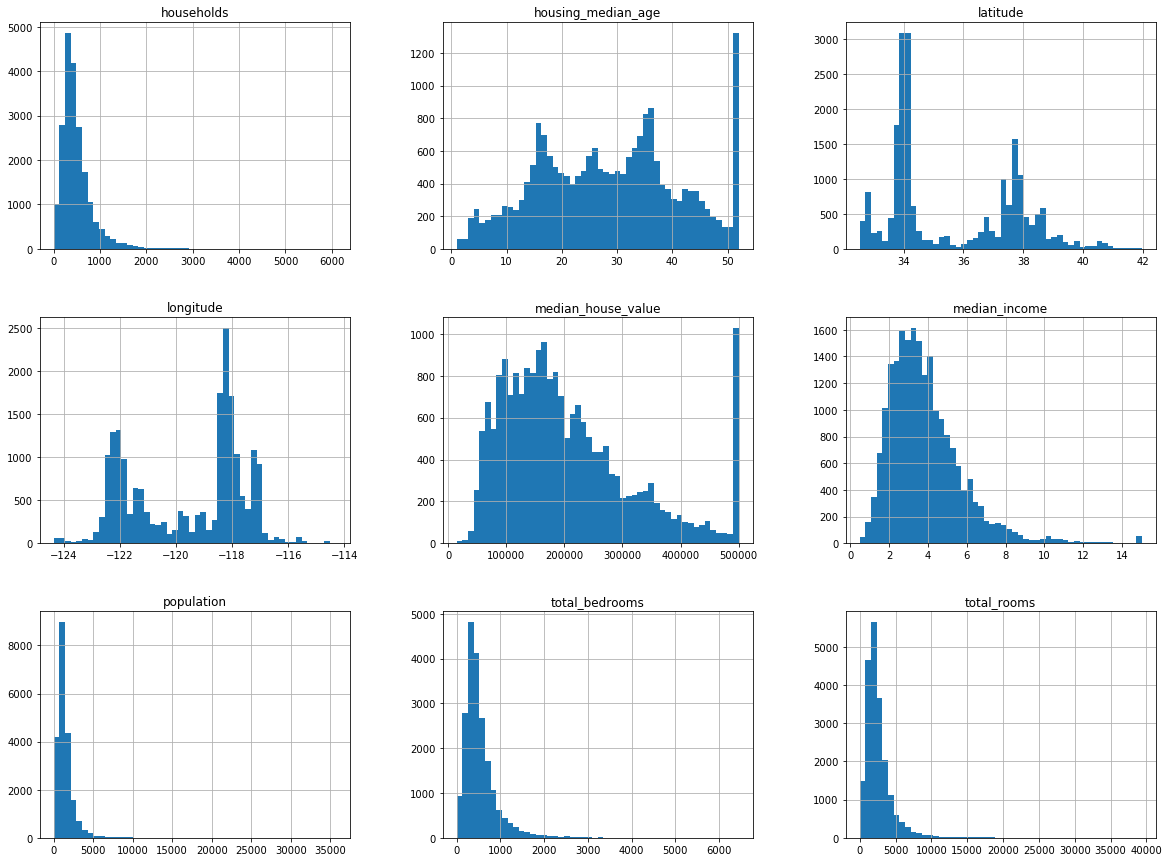

In [10]:
#plot the values as histogram chart. %matplotlib is a jupyter command which tells jupyter set setup matplotlib engine
# to plot curves within jupyter
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#one of the things to notice is that there are not normal distributions. Standard deviation works for normal distributions
#normal distributions are one which have 1 peak or mode and appear like bell curve
#another point to notice is that these are tail heavy distributions meaning the number of values beyond the mode are very 
#large on the right hand side of the curve.

In [11]:
import numpy as np

#this piece of code can load a dataset and split it in 80/20 split, however, 
# because we are using permutation, the problem that will happen is that it 
# will generate a new test set every single time. This is a problem for
# machine learning algorithms because ideally you do not want to see the whole 
# data set for training. 

# for effective machine learning you would depend upon your ability to hide certain
# part of the data set for training

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size= int(len(data) * test_ratio )
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)



In [12]:
#print information about the training set
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12083,-117.36,33.88,15.0,2857.0,421.0,1361.0,382.0,4.6875,189800.0,INLAND
17058,-122.24,37.48,40.0,4459.0,1027.0,2080.0,982.0,3.5322,361900.0,NEAR OCEAN
8145,-118.10,33.82,36.0,2422.0,420.0,1193.0,421.0,4.8462,225700.0,<1H OCEAN
18999,-121.95,38.35,16.0,2084.0,292.0,1099.0,292.0,5.8269,150200.0,INLAND
18867,-122.22,38.10,40.0,2549.0,478.0,1275.0,494.0,2.9469,111600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
11031,-117.84,33.78,26.0,2577.0,434.0,1086.0,432.0,4.6125,229200.0,<1H OCEAN
11183,-117.94,33.82,27.0,1366.0,326.0,878.0,325.0,3.4000,196900.0,<1H OCEAN
20294,-119.19,34.17,27.0,2183.0,364.0,1458.0,388.0,4.4567,191100.0,NEAR OCEAN
11522,-118.08,33.72,14.0,2021.0,396.0,696.0,367.0,7.1673,340700.0,NEAR OCEAN


In [13]:
print(len(train_set), "train + ", len(test_set), "test")

16512 train +  4128 test


In [14]:
# the following piece of code will ensure that the data set remains consistent
# we do this in the following way

# assume there is an identifier field of primary key for this data
# we compute the hash for the identifier and then take the last byte of the hash. This is assuming that the checksum is fully 
# random and will generate a normal distribution as well.

# If the last byte of each hash is less than test_ratio % of 256 which is the largest value you can represent in one byte
# you consider it part of the test set or otherwise you consider part of training set
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
# since the housing dataset we downloaded does not have index field, lets add one
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

#Note: since we are using pandas to generate the index, we need to make sure that anytime the data
#set gets modified we add rows to the bottom, otherwise the indexes will be all wrong and our logic
#of keeping consistent training set will be violated as well.

#if this is not possible think of a way to generate a unique way to generate an id
#according to the book i was reading one such way would be
housing_with_id["id"] = housing["latitude"] * 10000 + housing["longitude"]
# please note if the location is corase this can introduce sampling bias
#sampling bias: https://www.youtube.com/watch?v=PdXDLNNXPik

In [16]:
housing_with_id.head()
#as you can see this data set will cause sampling bias because location is coarse.

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,378677.77
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,378477.78
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,378377.76
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,378377.75
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,378377.75


In [17]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20619,20619,-121.56,39.01,22.0,1891.0,340.0,1023.0,296.0,2.7303,99100.0,INLAND
20625,20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND


In [18]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20634,20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In the next section we will try to use the scikit function which implements the same logic we have built earlier
This scikit function is called train_test_split and the following section is the documentation of this function
```
sklearn.model_selection.train_test_split(*arrays, **options)
```
Split arrays or matrices into random train and test subsets

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Rhe advantage of using this function is that it allows you to set the random_state parameter which is nothing but the random number generator seed

It can also processes multiple datasets with same number of rows and it will split the datasets on same indices. This can be useful if you have dataframes which are related but split

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=44)
#44 is the seed being sent to random number generator. Passing a fixed value will ensure that the same random numbers
#are generated every single time. This will ensure that our test data stays consistent.

In [20]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5567,-118.28,33.88,19.0,2758.0,675.0,2047.0,591.0,2.6618,179700.0,<1H OCEAN
3116,-117.76,35.63,12.0,2014.0,372.0,1027.0,356.0,3.9261,101300.0,INLAND
4750,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320,172700.0,<1H OCEAN
13963,-116.87,34.24,15.0,4419.0,822.0,622.0,267.0,3.9688,182800.0,INLAND
2262,-119.83,36.79,24.0,3505.0,819.0,2098.0,774.0,1.9575,67000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
18528,-122.04,36.96,44.0,1294.0,269.0,645.0,259.0,3.2437,223900.0,NEAR OCEAN
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,162500.0,<1H OCEAN
16955,-122.30,37.53,40.0,1833.0,308.0,751.0,306.0,6.0000,384200.0,NEAR OCEAN
3491,-118.47,34.27,33.0,1549.0,264.0,881.0,289.0,5.1408,222900.0,<1H OCEAN


In [21]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20127,-118.98,34.40,34.0,1328.0,244.0,795.0,227.0,4.4219,338100.0,<1H OCEAN
18256,-122.09,37.38,36.0,2587.0,416.0,1055.0,410.0,6.1995,407200.0,NEAR BAY
10376,-117.62,33.64,2.0,7826.0,893.0,2985.0,790.0,10.1531,484100.0,<1H OCEAN
4109,-118.39,34.14,34.0,4624.0,781.0,1572.0,719.0,6.5533,500001.0,<1H OCEAN
8169,-118.12,33.81,36.0,1774.0,299.0,784.0,298.0,5.0447,249200.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
2312,-119.74,36.85,3.0,10425.0,2121.0,4432.0,1778.0,3.9032,140800.0,INLAND
18574,-121.75,36.91,42.0,1368.0,468.0,2312.0,484.0,2.5599,151400.0,<1H OCEAN
14552,-117.13,32.97,10.0,3486.0,469.0,1700.0,483.0,6.4696,249500.0,<1H OCEAN
1430,-122.02,38.00,28.0,2965.0,533.0,1591.0,472.0,4.6375,178200.0,NEAR BAY


Yaay! you called your first scikit function.

What we have done so far is random sampling. This works when the datasets are truly large and are not structured in a particular way.

Sometimes this assumption is not true. Sometimes data engineers or surveyors collect this information based on sample which represents the population uniformly or has normal distibution of groups of people. This is called stratified sampling.

Each subgroup of people are called strata.

More details can be found here: https://www.youtube.com/watch?v=rsNCCQhkKN8

An example could be that if you have 40% of household which are considered lower middle income group, then the dataset should represent these households in same ratio. This means that 40% of the data was collected from households where lower middle income group population lives.

This is important to avoid sampling bias. Though non intuitive this calls for having sufficient number of groups or strata which are large enough and not have too many groups themselves. 

In [26]:
#divide the median income groups in groups of 1.5, and since we know that this distribution has long tail
#we mark all records with income > 5 as 5
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

# the function where will choose the first param value if the condition is true, and the second param value if the condition
# is false. Inplace indicates that the original data frame needs to be modified
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [28]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

The following section of code will use the scikit model selection function for generating Stratified splits

For more documentation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 44)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

As you will observe in the following code sections the ratio of number of samples in each category for original data set, training set and test set is largely of similar proportions.

This is why Stratified Shuffle split can be so important when partitioning data.

In [40]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [42]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [43]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In the above code we split the data based on median income based on a hypothesis and quick analysis of distribution. If you would like you can now remove the added attribute so that the splits are preserved but our atrifically introduced field is removed.

We use the pandas drop function to remove the column. The documentation can be found here
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [36]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis = 1, inplace = True)


In [37]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16564,-121.52,37.75,18.0,1544.0,272.0,825.0,286.0,4.3229,327300.0,INLAND
4729,-118.36,34.05,47.0,1424.0,300.0,632.0,278.0,4.0625,295200.0,<1H OCEAN
11611,-118.06,33.78,22.0,4048.0,562.0,1637.0,541.0,7.3463,355600.0,<1H OCEAN
8738,-118.31,33.82,26.0,2345.0,408.0,1195.0,377.0,5.4925,361700.0,<1H OCEAN
17723,-121.79,37.33,10.0,3283.0,550.0,2491.0,522.0,6.6633,283700.0,<1H OCEAN


## What have we done so far

We have now prepared two separate data splits one using the random split approach and another one using Stratified split technique.

## Data Visualization

In the following sections we will look at how we can create visualizations for our data set.

The first set of examples will use scatter plots.

### A small video lecture on Scatter Plots can be found here

https://www.youtube.com/watch?v=lL7q-DBvacg

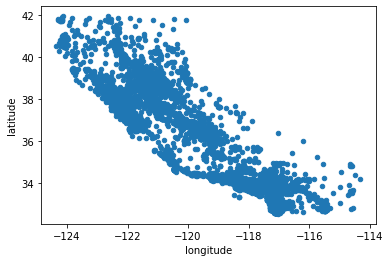

In [45]:
#make a copy of the train set so that we can always go back
housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude')

Does it look like California, yet!

One of the key things to take away is that by making small effort you can see how rich data often is. A plane old simple CSV file embeds a lot of information which can be used to generate a lot of insights.

Now lets see what else can be brought out from the same dataset by changing how we render this very same bit of information.

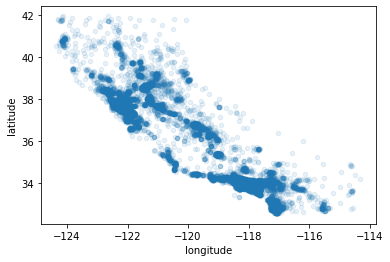

In [46]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.1)

What just happend? By using alpha level which controls the transparency of each point on the scatter plot. The new graph now plotted clearly identifies densly populated regions in the state of California.

In the next section we are going to plot a scatter plot which shows the median house price using a color scale at each of the points where people live in Califronia.

To achieve this we are using the pandas library plot function. Documentation can be found here

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

A video lecture on how to use notebooks and draw scatter plots can be found here

https://www.youtube.com/watch?v=iV3EM5rEpSY

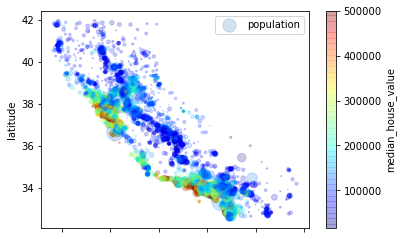

In [51]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, 
             s=housing["population"]/100, # this specifies the size of the marker. In our case it is propotional to number of poeple who live here 
             label='population', 
             c='median_house_value', # Column 'median_house_value' whose values will be used to color the marker points according to a colormap. 
             # Look at the graph below once you run it, you see a color scale and a value next to it. So orange point is home of highest value and
             # purple represents a home of minimum value 
             cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

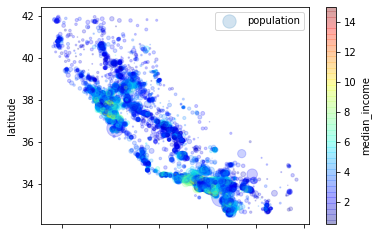

In [54]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, 
             s=housing["population"]/100, # this specifies the size of the marker. In our case it is propotional to number of poeple who live here 
             label='population', 
             c='median_income', 
             cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

One very interesting observation of this above plot is that home prices are not truly reflective of the median income. Though it is clear that people who live in places with higher median value of the houses tend to have slightly higher income. 


### Correlations

Lets compute the correlations between every pair of attribute on this data set. We will be computing the standard correlation coefficient or the Pearson's r. 

Pearsons' r represents the linear correlation between variables. Its value is always between 1 and -1. 
- A positive value will indicate that increase in value of one variable will cause an increase in the value of second variable.
- A negative value will demonstrate an inverse relationship wherein increase in value of one variable will cause the second to decrease
- A value of 0 will indicate no relationship
- A variable correlation to itself will always be 1

Note: You can do this here because the data set is not very large. However, be mindful as the datasets will grow in size the compute requirement of this function will increase drastically.

We are going to use the pandas dataframe function documentation for which can be found here
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

A tutorial for what is Pearsons' r correlation is can be found here
https://www.youtube.com/watch?v=2B_UW-RweSE


In [55]:
corr_matrix = housing.corr()

In [56]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924763,-0.099730,0.041447,0.065913,0.094354,0.050903,-0.012558,-0.043076,-0.008809
latitude,-0.924763,1.000000,0.000900,-0.032478,-0.063293,-0.103467,-0.066728,-0.081018,-0.146885,-0.085966
housing_median_age,-0.099730,0.000900,1.000000,-0.362429,-0.320450,-0.295414,-0.303055,-0.117433,0.112655,-0.149766
total_rooms,0.041447,-0.032478,-0.362429,1.000000,0.930641,0.857027,0.918728,0.199302,0.136582,0.222342
total_bedrooms,0.065913,-0.063293,-0.320450,0.930641,1.000000,0.876649,0.979382,-0.005331,0.054670,0.018505
population,0.094354,-0.103467,-0.295414,0.857027,0.876649,1.000000,0.906931,0.007504,-0.018452,0.028597
households,0.050903,-0.066728,-0.303055,0.918728,0.979382,0.906931,1.000000,0.015475,0.071470,0.040947
median_income,-0.012558,-0.081018,-0.117433,0.199302,-0.005331,0.007504,0.015475,1.000000,0.684733,0.902935
median_house_value,-0.043076,-0.146885,0.112655,0.136582,0.054670,-0.018452,0.071470,0.684733,1.000000,0.638807
income_cat,-0.008809,-0.085966,-0.149766,0.222342,0.018505,0.028597,0.040947,0.902935,0.638807,1.000000


In [57]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684733
income_cat            0.638807
total_rooms           0.136582
housing_median_age    0.112655
households            0.071470
total_bedrooms        0.054670
population           -0.018452
longitude            -0.043076
latitude             -0.146885
Name: median_house_value, dtype: float64

Another built-in utility inside of pandas is a scatter_matrix function which can plot every numerical attribute against every other numberical attribute.

The documentation for this function can be found here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

A tutorial for this function can be found here:

https://www.youtube.com/watch?v=SNurMMcFVy8
and 
https://www.youtube.com/watch?v=LoiVuDKxXBs

I like the second tutorial because it allows you to build an end to end financial analysis model, which is very interesting.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA839FEBA8>,
      dtype=object)

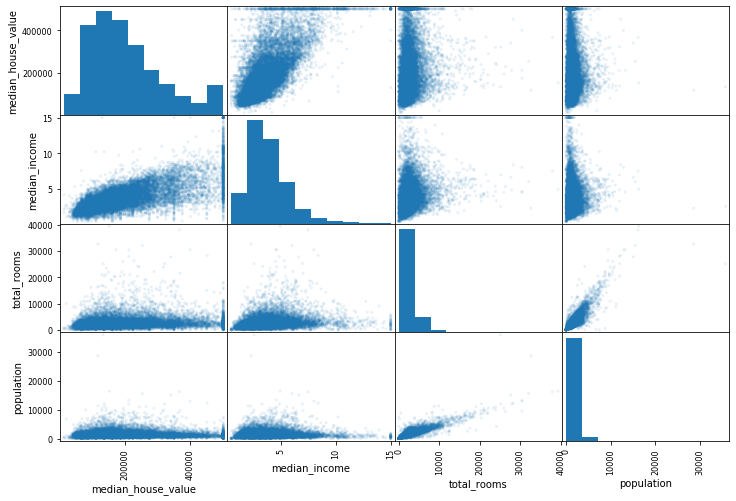

In [60]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "population"]
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.1)

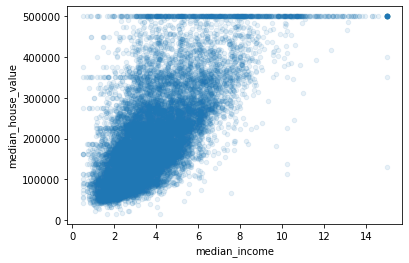

In [61]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

As you can see the strong correlation between medium_house_value and median_income is visible. This graph also shows that there may be some hidden patterns at certain values of home prices. The plot also calls out the cleanup we did wherein we capped the income category as we were creating the trainig set earlier.

TODO: explain this further.